<a href="https://colab.research.google.com/github/vvilliscool/ML_LIB_Class_Goorm/blob/master/goorm_20220804.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

(1797, 64)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']) [0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


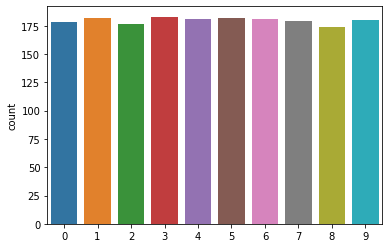

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)
print(digits.keys(), digits.target)
print(np.unique( digits.target ) )
sns.countplot(digits.target)

In [ ]:
X = digits.data             # 입력  
y = digits.target == 9      # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test')

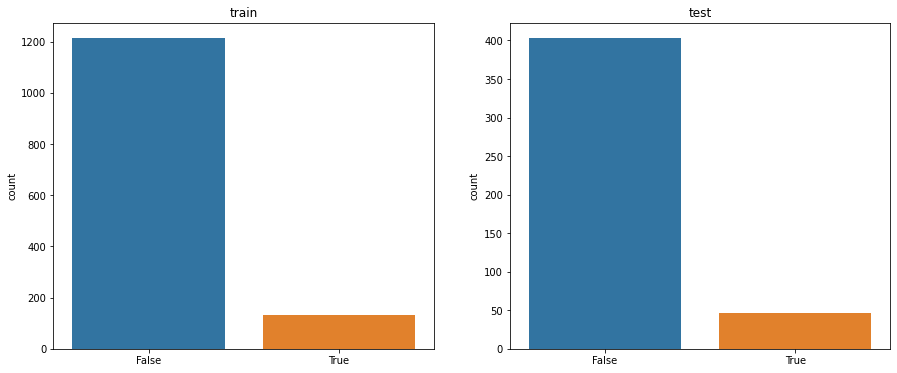

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
# y_train의 값 확인
sns.countplot(y_train)
plt.title("train")

plt.subplot(1, 2, 2)
# y_test의 값 확인
sns.countplot(y_test)
plt.title("test")

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_model.predict(X_test)

print("예측된 레이블의 고유값: {}".format(np.unique(pred_most_frequent)))
print("테스트 평가 정확도 : {:.2f}".format(dummy_model.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 평가 정확도 : 0.90


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print("학습용 평가 정확도 : {:.2f}".format(tree.score(X_train, y_train)))
print("테스트 평가 정확도: {:.2f}".format(tree.score(X_test, y_test)))

학습용 평가 정확도 : 0.94
테스트 평가 정확도: 0.92


오차행렬이용

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

logreg 점수: 0.98
오차 행렬:
[[402   1]
 [  6  41]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### 다양한 평가지표
 * 정확도 : TP + TN/(TP+FP+FN+TN) - 전체데이터중에 정확한 예측한 비율
 * 정밀도 : TP/(TP+FP)
    * 예측을 Positive로 한 것중에 실제로 맞춘 것(Positive)
 * 민감도 or 재현율, TPRate
    * TP/(TP+FN)
    * 실제 Positive 에서 예측을 정확하게 맞춘 것의 비율
 * 특이도 
    * 실제 음성(Negative)에서 정확하게 맞춘 것.
    * TN  / (FP + TN)
 * FPRate
    * 실제 음성(Negative)에서 예측을 실패한 것.
    * FP / (FP + TN)    

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                           target_names=["not 9", "is 9"]))

              precision    recall  f1-score   support

       not 9       0.90      1.00      0.94       403
        is 9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)  
pred_dummy = dummy.predict(X_test)

print("예측된 레이블의 고유값: {}".format(np.unique(pred_dummy)))
print("테스트 평가 정확도 : {:.2f}".format(dummy.score(X_test, y_test)))

print(classification_report(y_test, pred_dummy,
                            target_names=["not 9", "is 9"]))

예측된 레이블의 고유값: [False  True]
테스트 평가 정확도 : 0.82
              precision    recall  f1-score   support

       not 9       0.89      0.91      0.90       403
        is 9       0.05      0.04      0.05        47

    accuracy                           0.82       450
   macro avg       0.47      0.48      0.47       450
weighted avg       0.80      0.82      0.81       450



In [ ]:
# 의사결정나무의 (정확도, 정밀도, 민감도, f1-score)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print(classification_report(y_test, pred_tree, target_names=["not 9", "is 9"]))

              precision    recall  f1-score   support

       not 9       0.94      0.97      0.95       403
        is 9       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [ ]:
# 로지스틱 회귀의 (정확도, 정밀도, 민감도, f1-score)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

print( classification_report(y_test, pred_logreg, 
                     target_names=['not 9', 'is 9']) )

              precision    recall  f1-score   support

       not 9       0.99      1.00      0.99       403
        is 9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# 앙상블(랜덤포레스트)의 (정확도, 정밀도, 민감도, f1-score)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print(classification_report(y_test, pred_rf, target_names=["not 9", "is 9"]))

              precision    recall  f1-score   support

       not 9       0.97      1.00      0.98       403
        is 9       1.00      0.70      0.82        47

    accuracy                           0.97       450
   macro avg       0.98      0.85      0.90       450
weighted avg       0.97      0.97      0.97       450

